<a href="https://colab.research.google.com/github/faro7ah/python_project/blob/main/Iris_data_ROC_AUC_Confusion_matrix_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Confusion Matrix

#### Dataset Options
1. Binary Classification Dataset of Your Choice
2. Seattle Rain Dataset
    - `https://github.com/daniel-dc-cd/data_science/raw/master/module_3_Python/data/seattle_weather_1948-2017.csv`
    - Note: target is `RAIN`
3. Titanic Dataset
    - `https://github.com/daniel-dc-cd/data_science/raw/master/module_3_Python/data/titanic.csv`
3. Customer Churn
    - `https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv`
    - [Data dict](https://docs.google.com/document/d/1SxzoPHWxoLHx_kiPTZEzZOoda2chHbHLdMGAFsGIqCY/edit?usp=sharing)
    - Note: target is `Churn`
4. Iris dataset
    - `https://raw.githubusercontent.com/gumdropsteve/datasets/master/iris.csv`
    - Note: 3 possible classes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import*
from matplotlib import cm
cs = cm.Set2(np.arange(2)/2.)

1. Load in your dataset.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/datasets/master/iris.csv')

In [3]:
df = pd.DataFrame(df)

2. Find out some information about the data...

In [4]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,target
113,5.7,2.5,5.0,2.0,virginica,2
23,5.1,3.3,1.7,0.5,setosa,0
133,6.3,2.8,5.1,1.5,virginica,2
62,6.0,2.2,4.0,1.0,versicolor,1
87,6.3,2.3,4.4,1.3,versicolor,1


In [5]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   target        150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Cleaning Data

In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
target          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   target        150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


3. Show me the relationships in your data... 
- corr ([help](https://stackoverflow.com/a/50703596/11074111))
- pariplot
- some other visualizations (of your choice)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


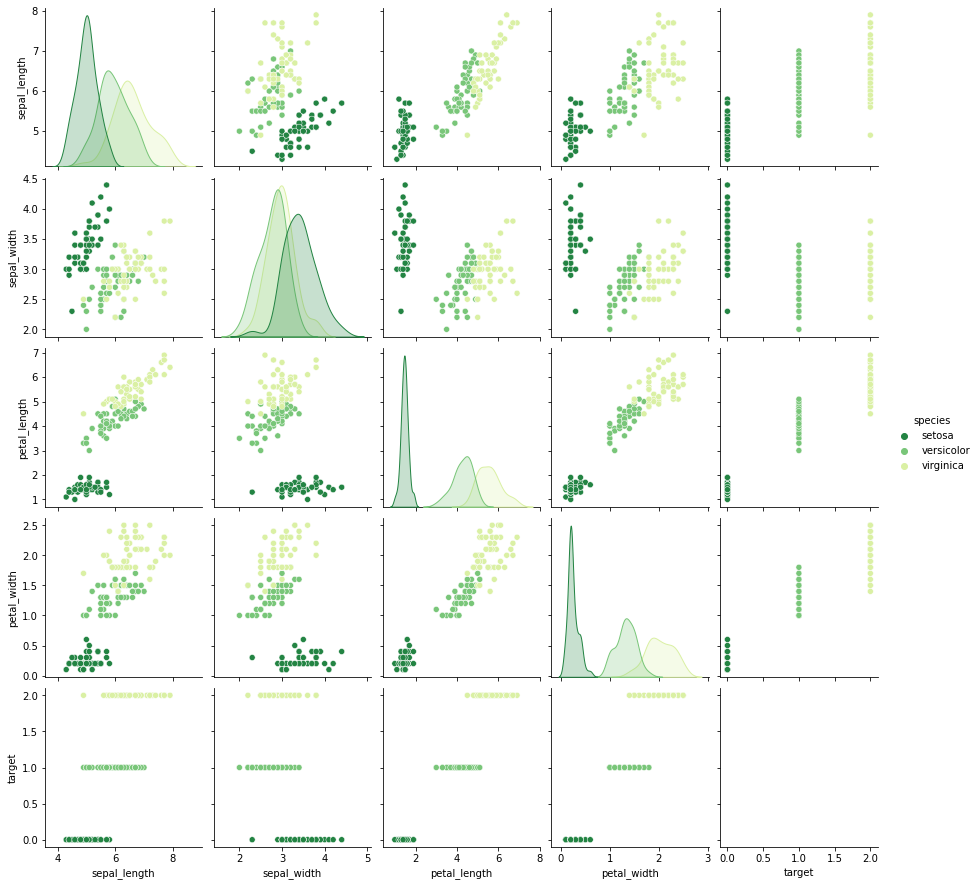

In [10]:
sns.pairplot(df, hue='species', palette='YlGn_r', diag_kind="kde")

In [11]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

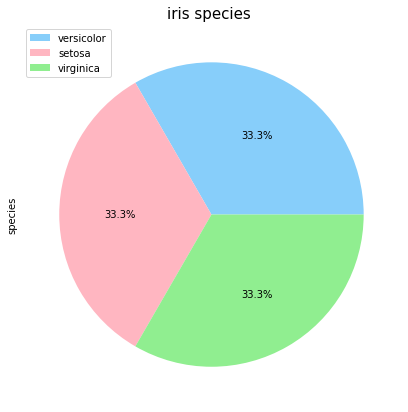

In [12]:
r = df.species.value_counts()
plt.figure(figsize=(10,7))
r.plot.pie(autopct='%.1f%%', labels=None, colors = ['lightskyblue', 'lightpink', 'lightgreen'], legend=True).set_title('iris species ', fontsize=15);


In [13]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [14]:
# correlation
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


4. Perform any data prep that needs to be done before splitting...

Note: may not be necessary, may require more cells

5. Split your data into training and testing datasets...

In [15]:
from sklearn.model_selection import train_test_split
X= df[['sepal_length', 'petal_length','petal_width']]
y=df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

6. Import, create, and fit a LogisticRegression model with 1 variable

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr = LogisticRegression()

In [18]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

6. Make predictions on your `X_test` values...

In [19]:
ypreds_log = lr.predict(X_test)

In [20]:
ypreds_log[-5:]

array([1, 0, 1, 0, 0])

In [21]:
y_test.tail()

82    1
32    0
76    1
2     0
28    0
Name: target, dtype: int64

7. Score your model...
- accuracy_score

In [22]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, lr.predict(X_test))
print("Accuracy is {:.2f}%".format(acc*100))

Accuracy is 100.00%


8. Confustion Matrix

In [23]:
df.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species,target
97,6.2,2.9,4.3,1.3,versicolor,1
78,6.0,2.9,4.5,1.5,versicolor,1
12,4.8,3.0,1.4,0.1,setosa,0
6,4.6,3.4,1.4,0.3,setosa,0
112,6.8,3.0,5.5,2.1,virginica,2
80,5.5,2.4,3.8,1.1,versicolor,1
67,5.8,2.7,4.1,1.0,versicolor,1
43,5.0,3.5,1.6,0.6,setosa,0
123,6.3,2.7,4.9,1.8,virginica,2
101,5.8,2.7,5.1,1.9,virginica,2


In [24]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

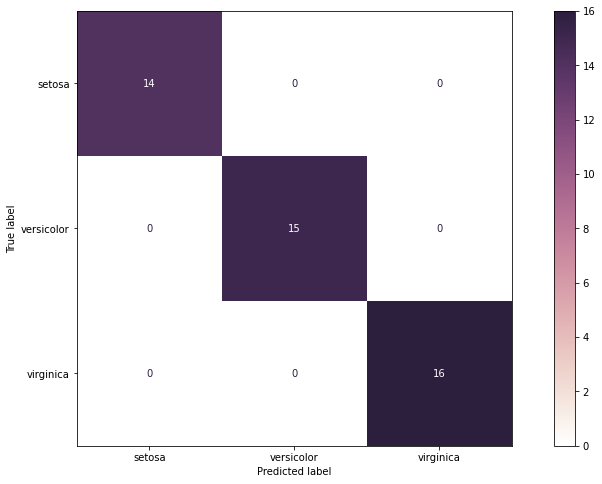

In [25]:
fig, ax = plt.subplots(figsize=(15, 8))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
labels = ['setosa', 'versicolor','virginica']
plot_confusion_matrix(lr, X=X_test , 
                      display_labels=labels,
                      y_true=y_test , cmap=cmap,
                      ax=ax);

9. Explain your confusion matrix...
- How many of each value (TP, FP, TN, FN) do you have?
- What does each mean?


## In this 3X3 confusion matrix, how can I determine TP, FP, TN, FN?


  **TP: 
  **FP: 
  **FN: 
  **TN: 

## Bonus

16. Perform GridSearchCV with the better data

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
p_grid = {'fit_intercept': [True, False], 'max_iter': [100, 250, 1000, 10000]}

In [28]:
grid = GridSearchCV(lr, p_grid)
grid

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'max_iter': [100, 250, 1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

17. Update the hyperparameters of your model (create and fit a new model with the results of GridSerachCV)

In [29]:
p_grid = {'fit_intercept': [True], 'max_iter':[100]}

In [30]:
grid = GridSearchCV(lr, cv=10, verbose=1, param_grid=p_grid)

In [31]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True], 'max_iter': [100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [32]:
grid.best_params_

{'fit_intercept': True, 'max_iter': 100}

In [33]:
grid.best_score_

0.9427272727272727

In [34]:
lr = LogisticRegression(fit_intercept= False, max_iter= 100)

In [35]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
lr.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
preds = lr.predict(X_test)
preds

array([2, 0, 1, 1, 2, 2, 2, 0, 1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 0,
       2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0])

14. Accuracy Score and Confusion Matrix

In [38]:
acc = accuracy_score(y_test, lr.predict(X_test))
print("Accuracy is {:.2f}%".format(acc*100))


Accuracy is 95.56%


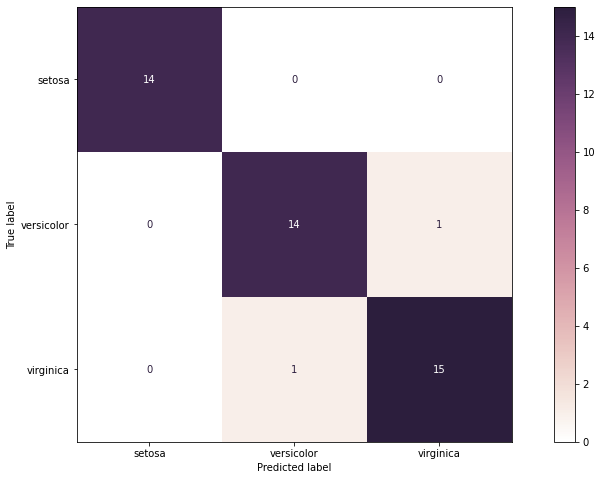

In [39]:
fig, ax = plt.subplots(figsize=(15, 8))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
labels = ['setosa', 'versicolor','virginica']
plot_confusion_matrix(lr, X=X_test , 
                      display_labels=labels,
                      y_true=y_test , cmap=cmap,
                      ax=ax);

In [40]:
acc = accuracy_score(y_test, lr.predict(X_test))
print("Accuracy is {:.2f}%".format(acc*100))

Accuracy is 95.56%


### Bonus Bonus
Figure out ROC plot. Tell me about it.

In [41]:
from sklearn.metrics import*
#from sklearn.metrics import roc_curve
#from sklearn.metrics import roc_auc_score

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X= df[['sepal_length', 'petal_length','petal_width']]
y=df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [62]:
model = SVC(probability=True)


In [63]:
model.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [64]:
preds = model.predict(X_test)


In [65]:
preds[-5:]


array([1, 0, 0, 2, 0])

In [66]:
y_test.tail()


65     1
11     0
18     0
105    2
38     0
Name: target, dtype: int64

In [67]:
acc = accuracy_score(y_test, lr.predict(X_test))
print("Accuracy is {:.2f}%".format(acc*100))

Accuracy is 100.00%


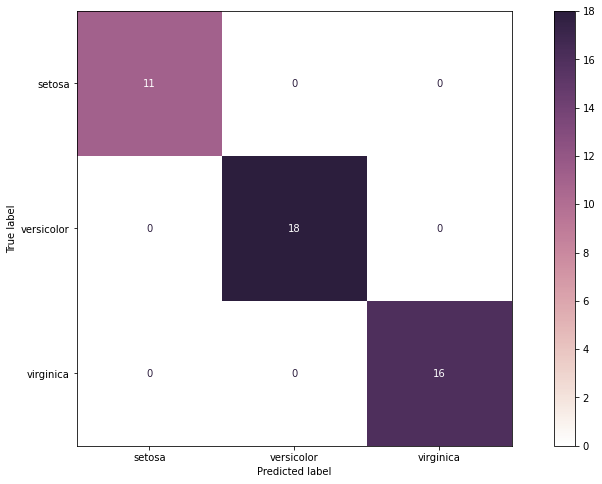

In [68]:
fig, ax = plt.subplots(figsize=(15, 8))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
labels = ['setosa', 'versicolor','virginica']
plot_confusion_matrix(lr, X=X_test, 
                      display_labels=labels,
                      y_true=y_test , cmap=cmap,
                      ax=ax);

In [69]:
p_grid ={'kernel' :['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma':['scale', 'auto'], 
              'decision_function_shape': ['ovo', 'ovr'], 
              'probability':[True]}

In [70]:
#grid = GridSearchCV(lr, cv=10, verbose=1, param_grid=p_grid)
grid = GridSearchCV(model,cv=10, param_grid=p_grid)
grid

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'probability': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [71]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'probability': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [72]:
grid.best_params_


{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True}

In [73]:
grid.best_score_

0.9709090909090909

In [74]:
#model = SVC(decision_function_shape= ['ovo'], gamma= ['auto'],
# kernel= ['poly'],
# probability= [True])


In [75]:
X_train

,sepal_length,petal_length,petal_width
89,5.5,4.0,1.3
8,4.4,1.4,0.2
126,6.2,4.8,1.8
13,4.3,1.1,0.1
34,4.9,1.5,0.1
...,...,...,...
112,6.8,5.5,2.1
21,5.1,1.5,0.4
141,6.9,5.1,2.3
137,6.4,5.5,1.8


In [76]:
y_train


89     1
8      0
126    2
13     0
34     0
      ..
112    2
21     0
141    2
137    2
15     0
Name: target, Length: 105, dtype: int64

In [77]:
acc = accuracy_score(y_test, lr.predict(X_test))
print("Accuracy is {:.2f}%".format(acc*100))

Accuracy is 100.00%


In [78]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [79]:
lr_probs = lr.predict_proba(X_test)


In [80]:
svc_probs = model.predict_proba(X_test)

In [83]:
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, lr_probs)
auc_logistic = auc(logistic_fpr,logistic_tpr)

svc_fpr, svc_tpr, threshold = roc_curve(y_test, preds)
auc_svc = auc(svc_fpr, svc_tpr)

plt.figure(figsize=(10,10), dpi=100)
plt.plot(svc_fpr, svc_tpr,linestyle='-', label ='SVC (auc = %0.3f)' % auc_svc)

plt.plot(logistic_fpr, logistic_tpr ,marker='.', label ='logistic (auc = %0.3f)' % auc_logistic)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()



ValueError: ignored